# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    f=x**2*numpy.sin(x)
    return f


Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*(numpy.sin(x))-((x**2-2)*numpy.cos(x))-2



Check your solution with the same numpy array:

In [73]:
assert g(0) == 0.

In [74]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [5]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [76]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [56]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    h=(xmax-xmin)/(N)
    d=0
    for i in range (0 ,N):
        d=d+(h/6)*(f(xmin+i*h)+4*(f((xmin+h/2+i*h)))+f(xmin+(i+1)*h))
    return d

   

Make sure you have implemented Simpson's rule correctly:

In [57]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [58]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


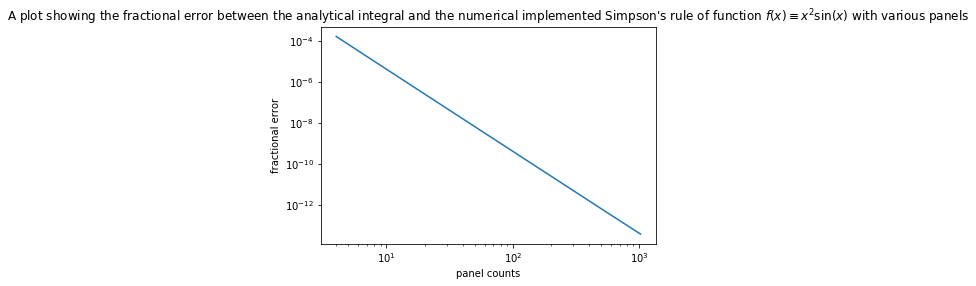

In [101]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
B=[]
for elem in panel_counts:
    N = elem
    result_numerical = integrate_numeric(x0, x1, N)
    y=(result_analytic - result_numerical)/abs(result_analytic)
    x=N
    B.append(y)
plt.xscale('log')
plt.yscale('log')
plt.plot(panel_counts,B)
plt.xlabel("panel counts")
plt.ylabel("fractional error")
plt.title("A plot showing the fractional error between the analytical integral and the numerical implemented Simpson's rule of function $\t{f}(x) \equiv x^{2}\sin(x)$ with various panels")
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The numerical result becomes more accurate when the number of panels become larger (within certain limits). But when the number of panels is taken too large, the error goes larger because of the limited processing power.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

When the calculation does not exceed the processing power, trapezium rule gives higher error compared to the Simpson's rule, and the error reduces slower when increasing the panels. However, when the number of panels is taken too large, where Simpson's rule does not reduce the error any more, the trapezium rule is still working and increasing the accuracy.